In [12]:
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt

# Ejercicio 1

En este ejercicio se analiza un árbol filogenético en formato Newick, un estándar ampliamente utilizado para representar relaciones evolutivas entre especies. A partir del árbol, se extrae información estructural relevante como el número de nodos y terminales, los nombres de las especies, las longitudes de las ramas y la organización en clados.

El análisis se realiza utilizando la librería Biopython, concretamente el módulo `Bio.Phylo`, que proporciona herramientas específicas para la lectura, manipulación y visualización de árboles filogenéticos.

Dado que el ejercicio se centra en el análisis estructural de árboles filogenéticos y no en su construcción, se ha utilizado un árbol en formato Newick generado manualmente, con longitudes de rama ficticias pero coherentes, con el único objetivo de ilustrar el uso de las herramientas de análisis proporcionadas por Biopython.

## 1. Lectura y visualización del árbol filogenético

Antes de analizar un árbol filogenético, es fundamental verlo. La filogenia, a parte de números y estructuras, es una representación visual de hipótesis evolutivas. Dibujar el árbol permitirá situarse, reconocer patrones evidentes y tener una intuición previa sobre cómo se agrupan las especies antes de entrar en el análisis computacional.

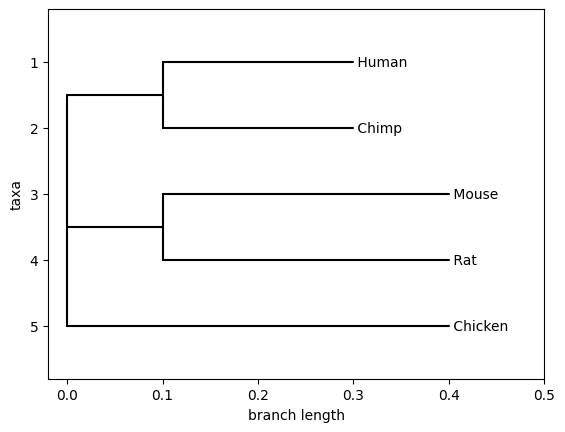

In [13]:
newick = "((Human:0.2,Chimp:0.2):0.1,(Mouse:0.3,Rat:0.3):0.1,Chicken:0.4);"
tree = Phylo.read(StringIO(newick), "newick")
Phylo.draw(tree)

El árbol muestra cinco especies terminales (Human, Chimp, Mouse, Rat y Chicken). Se observa claramente la agrupación de Human–Chimp y Mouse–Rat en dos clados hermanos, mientras que Chicken aparece como un linaje más distante, lo que concuerda con el conocimiento biológico general sobre la divergencia entre aves y mamíferos.

## 2. Número de nodos y terminales del árbol

Una vez comorendida la estructura, el análisis estructural de un árbol filogenético comienza describiendo de manera cuantitativa sus componentes básicos.

Las terminales representan las especies observadas, mientras que los nodos internos corresponden a ancestros comunes hipotéticos. Conocer su número va a permitir evaluar la complejidad del árbol y comprobar su coherencia topológica.

In [3]:
terminales = tree.get_terminals()
nodos_internos = tree.get_nonterminals()

print(f"Número de terminales (especies): {len(terminales)}")
print(f"Número de nodos internos: {len(nodos_internos)}")
print(f"Número total de nodos: {len(terminales) + len(nodos_internos)}")

Número de terminales (especies): 5
Número de nodos internos: 3
Número total de nodos: 8


Como se puede observar en los resultados, el árbol contiene 5 terminales, correspondientes a las cinco especies analizadas, y 3 nodos internos, que representan eventos de divergencia evolutiva.
El número total de nodos es 8, lo cual es coherente con un árbol binario completamente resuelto para cinco especies, y confirma que cada nodo interno representa una hipótesis de ancestro común entre dos o más linajes.

## 3. Identificación de las especies terminales

Antes de profundizar más, se ha considerado imoportante identificar explícitamente las especies presentes en el árbol para garantizar que el análisis se está realizando sobre los taxones correctos. Esto no solo evita confusiones, sino que ayuda a contextualizar biológicamente el árbol y a interpretar mejor los clados que aparecen más adelante.

In [4]:
print("Especies presentes en el árbol:")
for t in terminales:
    print("-", t.name)

Especies presentes en el árbol:
- Human
- Chimp
- Mouse
- Rat
- Chicken


In [5]:
sin_nombre = [t for t in terminales if t.name is None]
print(f"Terminales sin nombre: {len(sin_nombre)}")

Terminales sin nombre: 0


Los resultados demuestran que todas las terminales están correctamente etiquetadas y no se detectan especies sin nombre. Esto confirma que el árbol está bien definido y es apto para su análisis filogenético.

## 4. Análisis de las longitudes de las ramas

Uno de los aspectos más interesantes de los árboles filogenéticos es que las longitudes de las ramas suelen representar distancias evolutivas, como el número de sustituciones por sitio o una medida de divergencia genética. Estas longitudes aportan una dimensión cuantitativa que permite interpretar diferencias en la divergencia evolutiva entre linajes.

In [7]:
branch_lengths = []

for clado in tree.find_clades():
    if clado.branch_length is not None:
        branch_lengths.append(clado.branch_length)

print(f"Número de ramas con longitud definida: {len(branch_lengths)}")
print(f"Longitud mínima de rama: {min(branch_lengths):.4f}")
print(f"Longitud máxima de rama: {max(branch_lengths):.4f}")
print(f"Longitud media de rama: {sum(branch_lengths)/len(branch_lengths):.4f}")

Número de ramas con longitud definida: 7
Longitud mínima de rama: 0.1000
Longitud máxima de rama: 0.4000
Longitud media de rama: 0.2286


Se han identificado 7 ramas con longitud definida, con valores que oscilan entre 0.1 y 0.4. La rama más larga corresponde a Chicken, lo que sugiere una mayor distancia evolutiva respecto al resto de especies, mientras que las ramas más cortas reflejan relaciones más cercanas, como ocurre entre Human y Chimp o entre Mouse y Rat.

## 5. Clado raíz y profundidad del árbol

Identificar la raíz del árbol permite situar el ancestro común más reciente de todas las especies analizadas.

La profundidad máxima del árbol proporciona una medida de la distancia evolutiva acumulada desde la raíz hasta la especie más divergente, permitiendo evaluar la escala global del árbol

In [14]:
raiz = tree.root
print("Clado raíz:", raiz)
print(len(raiz.get_terminals()))

Clado raíz: Clade
5


In [9]:
depths = tree.depths()

max_depth = max(depths.values())
print(f"Profundidad máxima del árbol: {max_depth:.4f}")

Profundidad máxima del árbol: 0.4000


Al acceder al clado raíz del árbol mediante `tree.root`, Biopython devuelve un objeto de tipo Clade. Este resultado no corresponde a un nombre biológico, sino al tipo de estructura utilizada internamente para representar nodos filogenéticos.

El clado raíz representa el ancestro común más reciente de todas las especies analizadas y, aunque no tenga una etiqueta explícita, engloba a la totalidad de los taxones del árbol. Su análisis resulta clave para entender la jerarquía evolutiva global del conjunto estudiado.

La profundidad máxima del árbol es 0.4, lo que coincide con la longitud de la rama más larga. Esto indica que el árbol está correctamente escalado y que las distancias evolutivas están distribuidas de forma coherente.

## 6. Identificación del clado más amplio

Por último, he querido analizar cómo se agrupan las especies en clados y cuál de ellos engloba un mayor número de taxones.

El análisis de los clados permite identificar grupos de especies que comparten un ancestro común. Determinar el clado con mayor número de especies ayuda a comprender la organización jerárquica del árbol y a distinguir entre clados inclusivos y clados más específicos.

In [10]:
def tamaño_clado(clado):
    return len(clado.get_terminals())

clados = tree.get_nonterminals()
clado_mayor = max(clados, key=tamaño_clado)

print(f"Clado con mayor número de especies: {tamaño_clado(clado_mayor)}")
print("Especies de ese clado:")
for t in clado_mayor.get_terminals():
    print("-", t.name)

Clado con mayor número de especies: 5
Especies de ese clado:
- Human
- Chimp
- Mouse
- Rat
- Chicken


El clado más amplio contiene las cinco especies del árbol, lo que corresponde al clado raíz. Esto es esperable, ya que el clado raíz engloba a todos los taxones del árbol y representa el ancestro común de todo el conjunto analizado

## 7. Conclusión

A partir del análisis del árbol filogenético en formato Newick, se ha podido extraer información estructural clave sobre las relaciones evolutivas entre las especies estudiadas. El árbol presenta un total de cinco especies terminales organizadas en distintos clados, cada uno representando hipótesis de ancestros comunes.

El análisis de las longitudes de las ramas permite interpretar las distancias evolutivas entre especies, mientras que la identificación del clado más numeroso sugiere la presencia de un grupo evolutivamente más diverso dentro del conjunto analizado.

Este ejercicio demuestra cómo las herramientas de Biopython facilitan el estudio computacional de la filogenia, permitiendo no solo visualizar árboles, sino también analizarlos cuantitativamente.